In [1]:
import piplite
await piplite.install(['pandas', 'matplotlib', 'seaborn', 'numpy'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
file_name = 'AB_NYC_2019.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name)
    print("Success: Loaded from local path.")
else:
    from pyodide.http import open_url
    try:
        df = pd.read_csv(open_url(file_name))
        print("Success: Loaded via Pyodide URL.")
    except:
        print("Error: File not found. Please upload it via the left sidebar.")
        df = None

Success: Loaded from local path.


In [3]:
if df is not None:
    # Fill missing values
    df.fillna({'reviews_per_month': 0, 'name': 'Unknown', 'host_name': 'Unknown'}, inplace=True)
    
    # Quick view
    print(df.info())
    print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

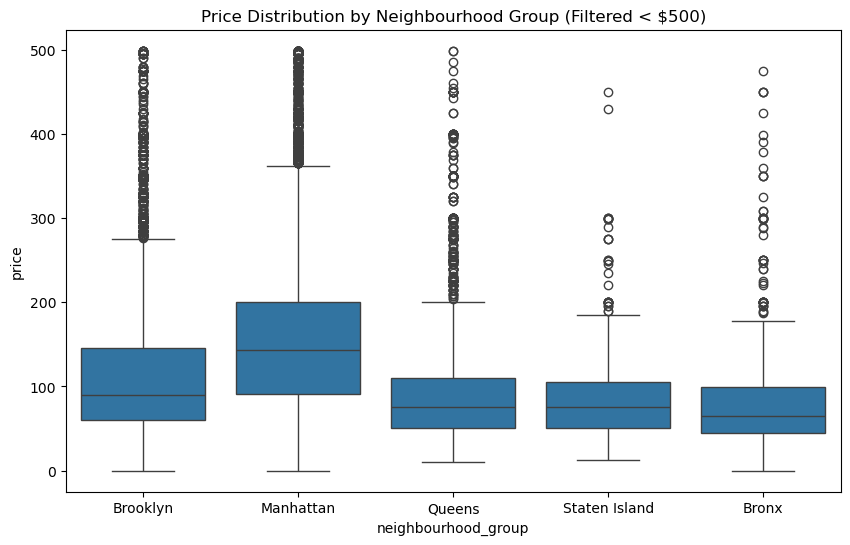

In [4]:
plt.figure(figsize=(10, 6))
# Removing outliers for a cleaner look (Price < 500)
sns.boxplot(x='neighbourhood_group', y='price', data=df[df.price < 500])
plt.title('Price Distribution by Neighbourhood Group (Filtered < $500)')
plt.show()

<ipython-input-5-81e378a04a39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='viridis')


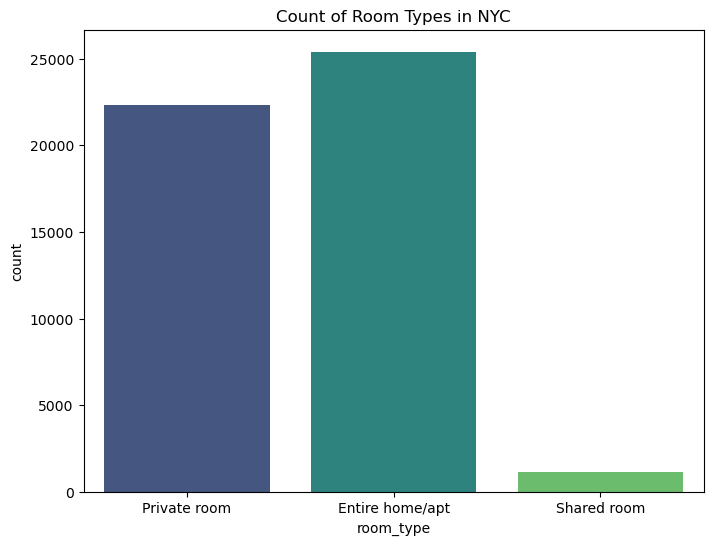

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='viridis')
plt.title('Count of Room Types in NYC')
plt.show()

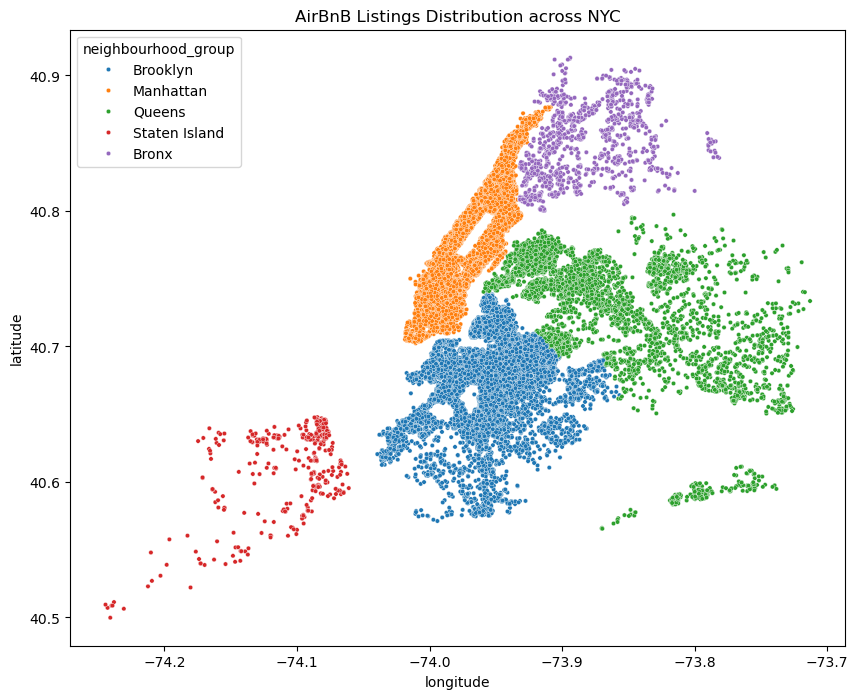

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=10)
plt.title('AirBnB Listings Distribution across NYC')
plt.show()

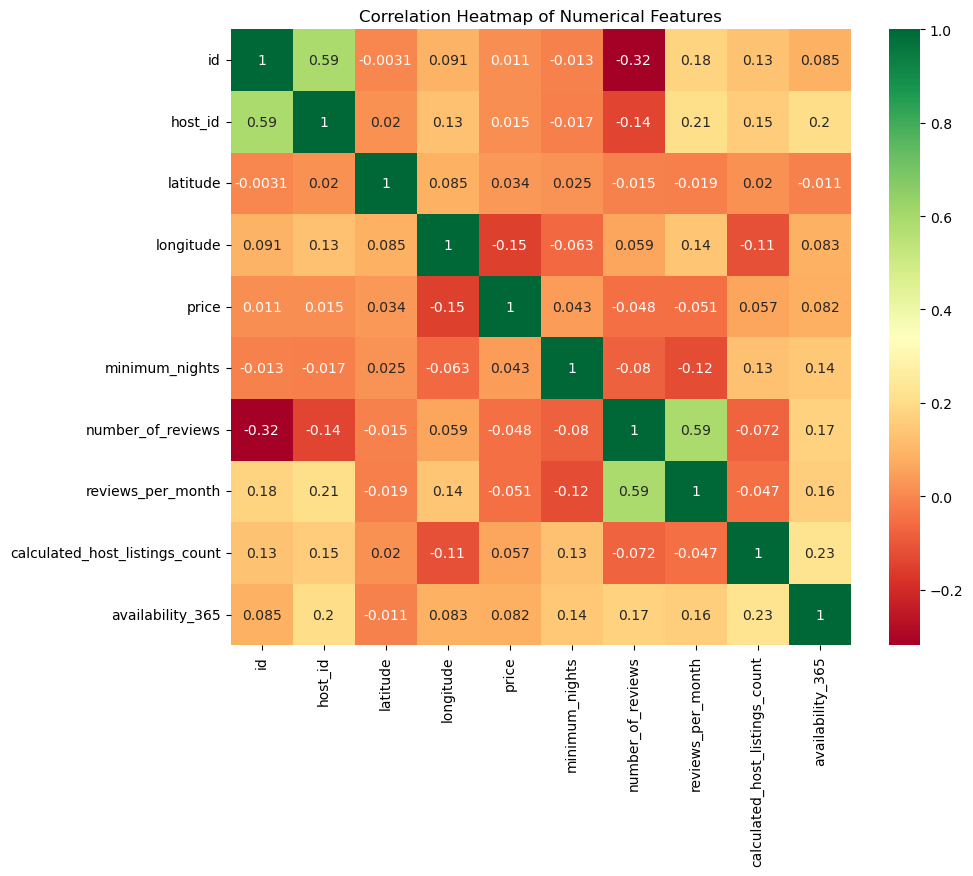

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()